# Data analisys from multi-spectral information

## MRobalinho - UPT 27-4-2019

In [257]:
# Add libraries
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Verify my current folder
currDir = os.path.dirname(os.path.realpath("__file__"))
mypath = currDir
print(currDir)  

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook


In [16]:
xfile  = 'upt_data.xlsx'  # Excel file
xsheet = 'imagedata01'   # Excel Sheet

arq_xls = mypath + '/'+xfile

In [17]:
df = pd.read_excel(xfile,sheetname=xsheet,header=0,converters={'Size':str,'Color_RGB':str})


C:\Users\manuel.robalinho\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [18]:
df

,Folder,File,Material,Size,Format,Mode,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,...,Number_elements,Color,Color_RGB,Color_hex,Color_dec,Med_Extrems,Max_Histog,Idx_Max_Histog,Min_Histog,Idx_Min_Histog
0,imagedata01,aluminum_001.tif,aluminum,"(2048, 1536)",TIFF,RGB,545.068256,183.261659,183.261659,178.544938,...,768,white,"(255, 255, 255)",#ffffff,16777215,105.333333,61168,46,0,0
1,imagedata01,aluminum_002.tif,aluminum,"(2048, 1536)",TIFF,RGB,540.936637,181.884441,181.884441,177.167755,...,768,white,"(255, 255, 255)",#ffffff,16777215,117.166667,60230,50,0,0
2,imagedata01,aluminum_003.tif,aluminum,"(2048, 1536)",TIFF,RGB,618.976585,207.898200,207.898200,203.180185,...,768,white,"(255, 255, 255)",#ffffff,16777215,92.166667,74860,51,0,0
3,imagedata01,aluminum_004.tif,aluminum,"(2048, 1536)",TIFF,RGB,870.570444,291.771916,291.771916,287.026612,...,768,white,"(255, 255, 255)",#ffffff,16777215,133.500000,39307,32,0,0
4,imagedata01,alum_001.tif,alum,"(2048, 1536)",TIFF,RGB,545.068256,183.261659,183.261659,178.544938,...,768,white,"(255, 255, 255)",#ffffff,16777215,105.333333,61168,46,0,0
5,imagedata01,alum_002.tif,alum,"(2048, 1536)",TIFF,RGB,540.936637,181.884441,181.884441,177.167755,...,768,white,"(255, 255, 255)",#ffffff,16777215,117.166667,60230,50,0,0
6,imagedata01,alum_003.tif,alum,"(2048, 1536)",TIFF,RGB,618.976585,207.898200,207.898200,203.180185,...,768,white,"(255, 255, 255)",#ffffff,16777215,92.166667,74860,51,0,0
7,imagedata01,alum_004.tif,alum,"(2048, 1536)",TIFF,RGB,870.570444,291.771916,291.771916,287.026612,...,768,white,"(255, 255, 255)",#ffffff,16777215,133.500000,39307,32,0,0
8,imagedata01,brass_001.tif,brass,"(2048, 1536)",TIFF,RGB,851.931316,285.553110,285.553110,280.825096,...,768,white,"(255, 255, 255)",#ffffff,16777215,135.000000,41589,60,0,0
9,imagedata01,brass_002.tif,brass,"(2048, 1536)",TIFF,RGB,787.771580,264.185042,264.185042,259.401496,...,768,white,"(255, 255, 255)",#ffffff,16777215,136.000000,45750,58,0,0


In [258]:
# Adjust Material name
df['Material'].replace('alum', 'aluminum',inplace=True)
df['Material'].replace('plasticised', 'plasticised_copper',inplace=True)
df['Material'].replace('stainless', 'stainless_steel',inplace=True)
df['Material'].replace('painted', 'painted_iron',inplace=True)
df


,Folder,File,Material,Size,Format,Mode,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,...,Number_elements,Color,Color_RGB,Color_hex,Color_dec,Med_Extrems,Max_Histog,Idx_Max_Histog,Min_Histog,Idx_Min_Histog
0,imagedata01,aluminum_001.tif,aluminum,"(2048, 1536)",TIFF,RGB,545.068256,183.261659,183.261659,178.544938,...,768,white,"(255, 255, 255)",#ffffff,16777215,105.333333,61168,46,0,0
1,imagedata01,aluminum_002.tif,aluminum,"(2048, 1536)",TIFF,RGB,540.936637,181.884441,181.884441,177.167755,...,768,white,"(255, 255, 255)",#ffffff,16777215,117.166667,60230,50,0,0
2,imagedata01,aluminum_003.tif,aluminum,"(2048, 1536)",TIFF,RGB,618.976585,207.898200,207.898200,203.180185,...,768,white,"(255, 255, 255)",#ffffff,16777215,92.166667,74860,51,0,0
3,imagedata01,aluminum_004.tif,aluminum,"(2048, 1536)",TIFF,RGB,870.570444,291.771916,291.771916,287.026612,...,768,white,"(255, 255, 255)",#ffffff,16777215,133.500000,39307,32,0,0
4,imagedata01,alum_001.tif,aluminum,"(2048, 1536)",TIFF,RGB,545.068256,183.261659,183.261659,178.544938,...,768,white,"(255, 255, 255)",#ffffff,16777215,105.333333,61168,46,0,0
5,imagedata01,alum_002.tif,aluminum,"(2048, 1536)",TIFF,RGB,540.936637,181.884441,181.884441,177.167755,...,768,white,"(255, 255, 255)",#ffffff,16777215,117.166667,60230,50,0,0
6,imagedata01,alum_003.tif,aluminum,"(2048, 1536)",TIFF,RGB,618.976585,207.898200,207.898200,203.180185,...,768,white,"(255, 255, 255)",#ffffff,16777215,92.166667,74860,51,0,0
7,imagedata01,alum_004.tif,aluminum,"(2048, 1536)",TIFF,RGB,870.570444,291.771916,291.771916,287.026612,...,768,white,"(255, 255, 255)",#ffffff,16777215,133.500000,39307,32,0,0
8,imagedata01,brass_001.tif,brass,"(2048, 1536)",TIFF,RGB,851.931316,285.553110,285.553110,280.825096,...,768,white,"(255, 255, 255)",#ffffff,16777215,135.000000,41589,60,0,0
9,imagedata01,brass_002.tif,brass,"(2048, 1536)",TIFF,RGB,787.771580,264.185042,264.185042,259.401496,...,768,white,"(255, 255, 255)",#ffffff,16777215,136.000000,45750,58,0,0


In [107]:
df_plot = df.copy

In [ ]:
'''
# Adjust values to better plot
df_plot.Sum_Ch0        = df_plot.Sum_Ch0 + 100 # to have diference lines during plot
df_plot.Sum_Ch1        = df_plot.Sum_Ch1 + 500
df_plot.Sum_Ch2        = df_plot.Sum_Ch2 + 1000
df_plot.Color_dec      = df_plot.Color_dec / 1000
df_plot.Color_dec      = df_plot.Color_dec - 5000
df_plot.Med_Extrems    = df_plot.Med_Extrems * 10
df_plot.Max_Histog     = df_plot.Max_Histog / 1000
df_plot.Idx_Max_Histog = df_plot.Idx_Max_Histog + 1000
df_plot.Min_Histog     = df_plot.Min_Histog * 100
df_plot.Idx_Min_Histog = df_plot.Idx_Min_Histog * 10
df_plot
'''

In [125]:
# Create pivot table
df_plot1 = df.groupby('Material')['All_Bands', 'Sum_Ch0','Sum_Ch1','Sum_Ch2','Color_dec',
                                       'Med_Extrems', 'Max_Histog', 'Idx_Max_Histog','Min_Histog','Idx_Min_Histog'].mean()
df_plot1

,All_Bands,Sum_Ch0,Sum_Ch1,Sum_Ch2,Color_dec,Med_Extrems,Max_Histog,Idx_Max_Histog,Min_Histog,Idx_Min_Histog
Material,,,,,,,,,,
aluminum,643.887981,216.204054,216.204054,211.479872,16777215.0,112.041667,58891.250000,44.750000,0.0,0.0
brass,825.728515,276.826776,276.826776,272.074963,16777215.0,134.833333,40067.333333,52.000000,0.0,0.0
copper,730.049184,244.939018,244.939018,240.171148,16777215.0,133.200000,74817.000000,78.000000,0.0,0.0
iron,682.960808,229.237879,229.237879,224.485050,16777215.0,133.277778,58593.000000,113.333333,0.0,0.0
painted_iron,777.724374,260.814003,260.814003,256.096367,16777215.0,116.833333,61776.000000,74.666667,0.0,0.0
plasticised_copper,828.598597,277.780598,277.780598,273.037401,16777215.0,133.750000,52572.000000,21.000000,0.0,0.0
stainless_steel,691.437341,232.064396,232.064396,227.308549,16777215.0,133.000000,66608.666667,116.333333,0.0,0.0


In [144]:
# Plot Correlation
def plot_corr(xdf,material,xsheet):
    x,y = 10,5
    
    fig, ax = plt.subplots()
    sns.heatmap(xdf.corr(method='pearson'), annot=True, fmt='.2f', 
                cmap=plt.get_cmap('coolwarm'), cbar=True, ax=ax)

    ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
    plt.title('Correlation: '+material,fontsize=20)
    plt.savefig(xsheet+'_Corr_'+material+'.png', bbox_inches='tight', pad_inches=0.0)

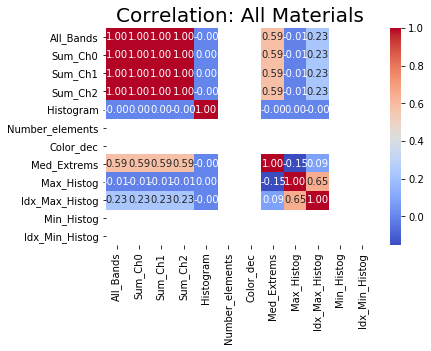

In [145]:
material = 'All'
df_x = df

# Plot Correlation
plot_corr(df_x,'All Materials',xsheet)

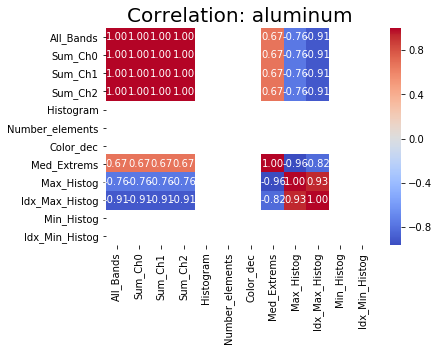

In [146]:
material = 'aluminum'
df_x = df[df['Material']== material]

# Plot Correlation
plot_corr(df_x,'aluminum',xsheet)

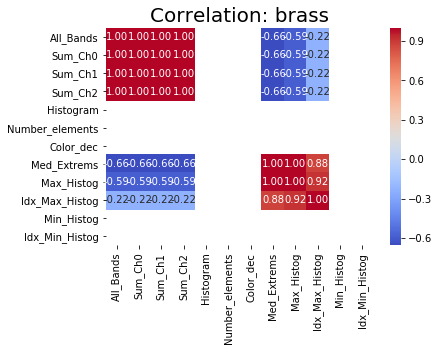

In [147]:
material = 'brass'
df_x = df[df['Material']== material]

# Plot Correlation
plot_corr(df_x,'brass',xsheet)

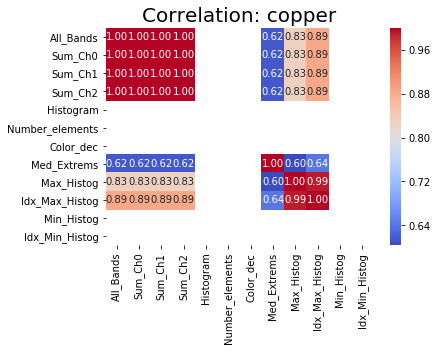

In [148]:
material = 'copper'
df_x = df[df['Material']== material]

# Plot Correlation
plot_corr(df_x,'copper',xsheet)

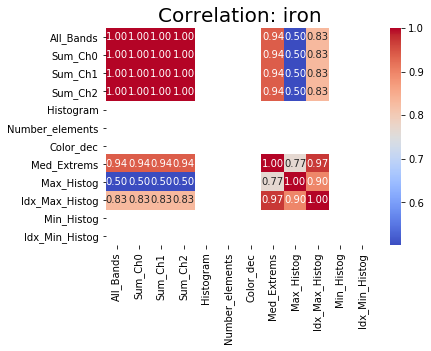

In [149]:
material = 'iron'
df_x = df[df['Material']== material]

# Plot Correlation
plot_corr(df_x,'iron',xsheet)

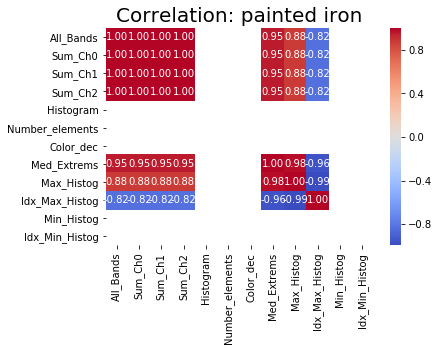

In [150]:
material = 'painted_iron'
df_x = df[df['Material']== material]

# Plot Correlation
plot_corr(df_x,'painted iron',xsheet)

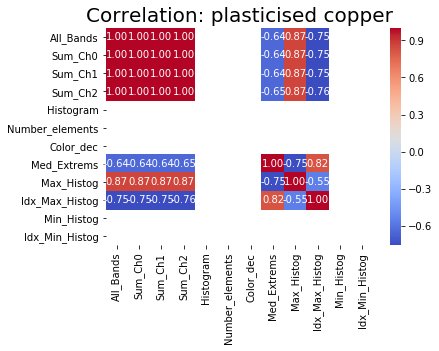

In [151]:

material = 'plasticised_copper'
df_x = df[df['Material']== material]

# Plot Correlation
plot_corr(df_x,'plasticised copper',xsheet)

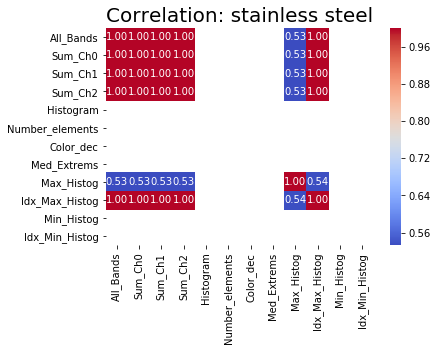

In [152]:


material = 'stainless_steel'
df_x = df[df['Material']== material]

# Plot Correlation
plot_corr(df_x,'stainless steel',xsheet)

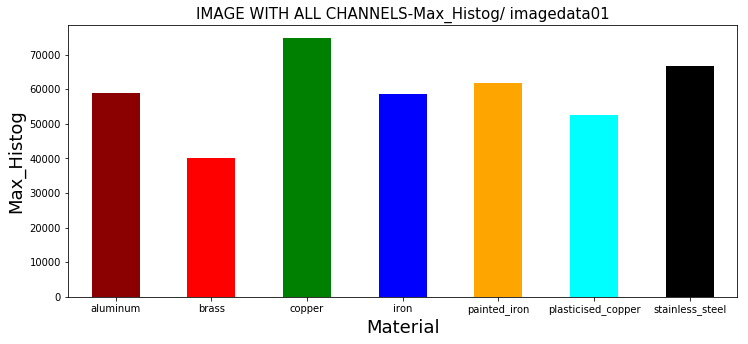

In [250]:
df_Max_Histog = pd.DataFrame(df_plot1.Max_Histog)
color = ['darkred','red','green','blue','orange','cyan','black','yellow']

df_Max_Histog.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(12,5))
plt.title('IMAGE WITH ALL CHANNELS-Max_Histog/ '+xsheet,fontsize=15)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Max_Histog',fontsize=18)
plt.savefig(xsheet+'_Max_Histog.png')   # Save  Figure
plt.show()

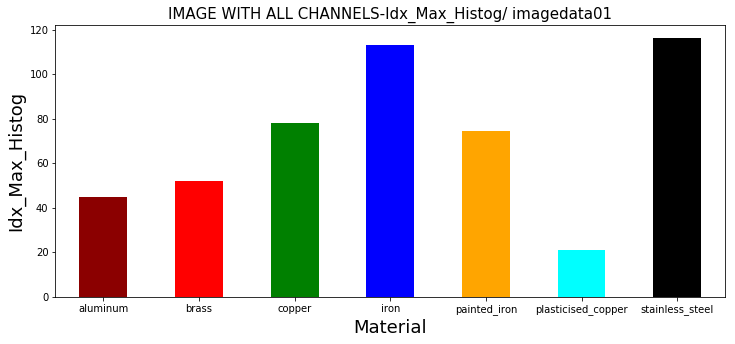

In [255]:
df_Idx_Max_Histog = pd.DataFrame(df_plot1.Idx_Max_Histog)
color = ['darkred','red','green','blue','orange','cyan','black','yellow']

df_Idx_Max_Histog.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(12,5))
plt.title('IMAGE WITH ALL CHANNELS-Idx_Max_Histog/ '+xsheet,fontsize=15)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Idx_Max_Histog',fontsize=18)

plt.savefig(xsheet+'_Idx_Max_Histog.png')   # Save  Figure
plt.show()

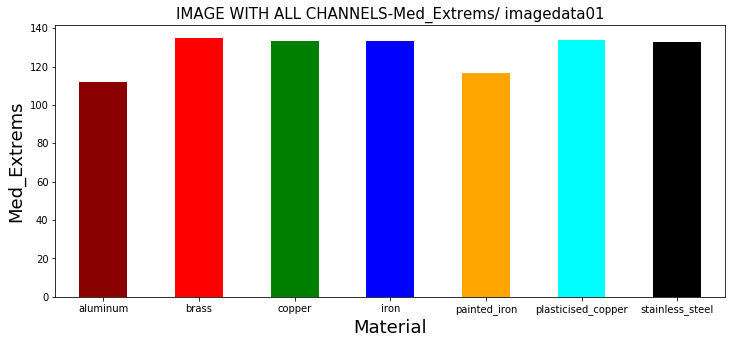

In [256]:

df_Med_Extrems = pd.DataFrame(df_plot1.Med_Extrems)
color = ['darkred','red','green','blue','orange','cyan','black','yellow']

df_Med_Extrems.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(12,5))
plt.title('IMAGE WITH ALL CHANNELS-Med_Extrems/ '+xsheet,fontsize=15)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Med_Extrems',fontsize=18)
#plt.legend(loc='upper right', ncol=3, fancybox=True, shadow=True)

plt.savefig(xsheet+'_Med_Extrems.png')   # Save  Figure
plt.show()

In [139]:
# Create pivot table
df_plot2 = df.groupby('Material')['Color_dec','Med_Extrems', 'Max_Histog', 
                                  'Idx_Max_Histog','Min_Histog','Idx_Min_Histog'].mean()
df_plot2

,Color_dec,Med_Extrems,Max_Histog,Idx_Max_Histog,Min_Histog,Idx_Min_Histog
Material,,,,,,
aluminum,16777215.0,112.041667,58891.250000,44.750000,0.0,0.0
brass,16777215.0,134.833333,40067.333333,52.000000,0.0,0.0
copper,16777215.0,133.200000,74817.000000,78.000000,0.0,0.0
iron,16777215.0,133.277778,58593.000000,113.333333,0.0,0.0
painted_iron,16777215.0,116.833333,61776.000000,74.666667,0.0,0.0
plasticised_copper,16777215.0,133.750000,52572.000000,21.000000,0.0,0.0
stainless_steel,16777215.0,133.000000,66608.666667,116.333333,0.0,0.0


In [140]:
# Arranje values
df_plot2.Color_dec      = df_plot2.Color_dec / 100000
df_plot2.Max_Histog     = df_plot2.Max_Histog / 100
df_plot2.Idx_Max_Histog = df_plot2.Idx_Max_Histog + 200
df_plot2.Min_Histog     = df_plot2.Min_Histog +20
df_plot2.Idx_Min_Histog = df_plot2.Idx_Min_Histog + 5
df_plot2
##

,Color_dec,Med_Extrems,Max_Histog,Idx_Max_Histog,Min_Histog,Idx_Min_Histog
Material,,,,,,
aluminum,167.77215,112.041667,588.912500,244.750000,20.0,5.0
brass,167.77215,134.833333,400.673333,252.000000,20.0,5.0
copper,167.77215,133.200000,748.170000,278.000000,20.0,5.0
iron,167.77215,133.277778,585.930000,313.333333,20.0,5.0
painted_iron,167.77215,116.833333,617.760000,274.666667,20.0,5.0
plasticised_copper,167.77215,133.750000,525.720000,221.000000,20.0,5.0
stainless_steel,167.77215,133.000000,666.086667,316.333333,20.0,5.0


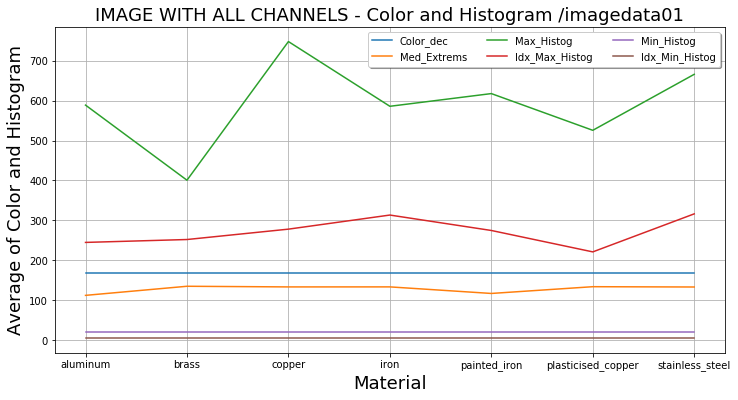

In [261]:
loc_Array_sum = np.arange(len(df_plot2.index))
xtick_loc = list(loc_Array_sum)  
xticks = list(df_plot1.index)

df_plot2.plot( y=['Color_dec','Med_Extrems', 'Max_Histog', 'Idx_Max_Histog',
                  'Min_Histog','Idx_Min_Histog'],figsize=(12,6), grid=True )

plt.xticks(xtick_loc, df_plot2.index, rotation=0)
plt.title('IMAGE WITH ALL CHANNELS - Color and Histogram /'+xsheet,fontsize=18)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of Color and Histogram',fontsize=18)
plt.legend(loc='upper right', ncol=3, fancybox=True, shadow=True)

plt.savefig(xsheet+'_Color_and_Histogram.png')   # Save  Figure
plt.show()

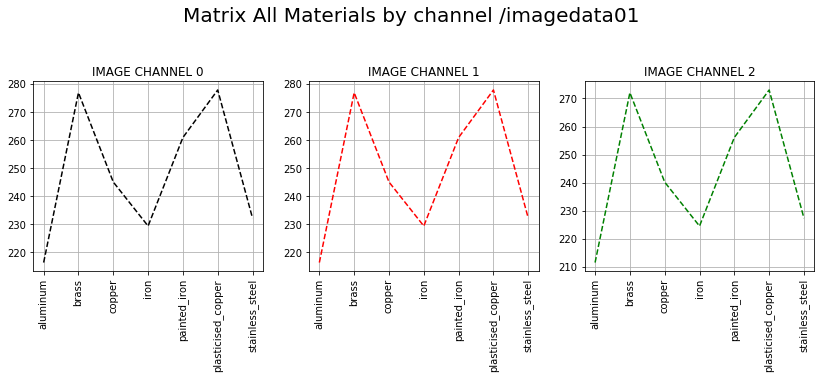

In [262]:
# Plot Channel separately
# Create pivot table
df_plot3 = df.groupby('Material')['All_Bands','Sum_Ch0', 'Sum_Ch1', 'Sum_Ch2'].mean()
df_plot3

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14,8))
gs0 = gridspec.GridSpec(2, 1)   # Spaces between graphics
fig.subplots_adjust(top=0.85)
fig.suptitle('Matrix All Materials by channel /'+xsheet,size=20) # or plt.suptitle('Main title')
plt.tight_layout()

plt.subplot(231)
plt.title('IMAGE CHANNEL 0')
plt.xticks(rotation=90)
plt.grid(True)
plt.plot(df_plot3.Sum_Ch0, 'k--')

plt.subplot(232)
plt.title('IMAGE CHANNEL 1')
plt.xticks(rotation=90)
plt.grid(True)
plt.plot(df_plot3.Sum_Ch1,  'r--')

plt.subplot(233)
plt.title('IMAGE CHANNEL 2')
plt.xticks(rotation=90)
plt.plot(df_plot3.Sum_Ch2,  'g--')
plt.grid(True)
#plt.legend(loc='upper right', ncol=3, fancybox=True, shadow=True)

plt.savefig(xsheet+'_Matrix_Channels.png')   # Save  Figure
plt.show()

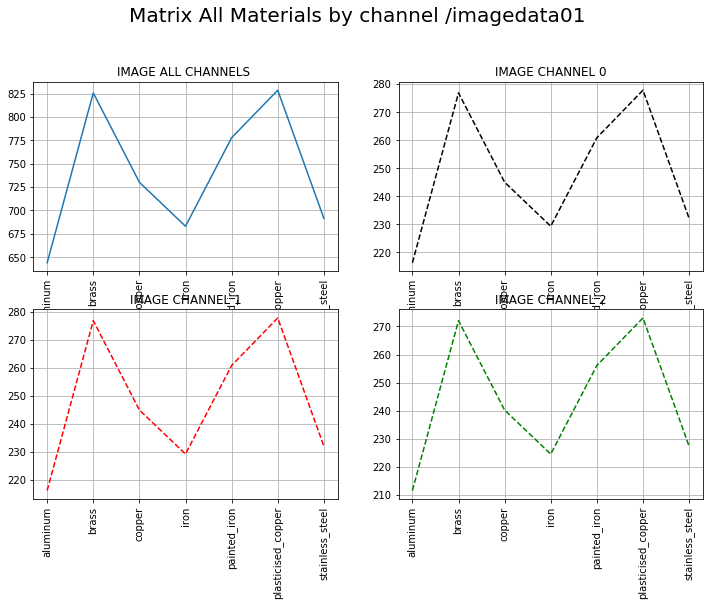

In [263]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(12,8))
gs0 = gridspec.GridSpec(2, 1)   # Spaces between graphics

for i in range(1,5):
    ax=fig.add_subplot(2,2,i)

    plt.xticks(rotation=90)
    if i == 1:
        ax=plt.plot(df_plot3.All_Bands)
        plt.grid(True,which="both",ls="-")
        plt.title('IMAGE ALL CHANNELS ')
    if i == 2:
        ax=plt.plot(df_plot3.Sum_Ch0, 'k--')
        plt.grid(True,which="both",ls="-")
        plt.title('IMAGE CHANNEL 0')
    if i == 3:
        ax=plt.plot(df_plot3.Sum_Ch1, 'r--')
        plt.grid(True,which="both",ls="-")
        plt.title('IMAGE CHANNEL 1')
    if i == 4:
        ax=plt.plot(df_plot3.Sum_Ch2, 'g--') 
        plt.grid(True,which="both",ls="-")
        plt.title('IMAGE CHANNEL 2')

        # Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.subplots_adjust(top=0.85)
fig.suptitle('Matrix All Materials by channel /'+xsheet,size=20) # or plt.suptitle('Main title')
plt.show()